### Loading Module and Datasets

In [ ]:
import anndata as ad
import numpy as np
import scanpy as sc
import os
from scHSC import scHSCModel
import matplotlib.pyplot as plt


os.environ['CUDA_VISIBLE_DEVICES'] = '5'
dataset = 'Quake_10x_Bladder'
adata_raw = ad.read(f'./data/{dataset}.h5ad')
adata_raw.raw=adata_raw
nclusters = len(np.unique(adata_raw.obs['cluster']))

### scHSC Clustering


In [ ]:
save_dir = "./temp/"
schsc = scHSCModel(log_path=save_dir)
adata = schsc.preprocess(adata_raw, preprocessed = False) 
schsc.train(adata, target_clusters = nclusters)
plt.plot(range(1,len(schsc.loss_list)+1),schsc.loss_list)

### Visulization of Clustering Results

In [ ]:
sc.pp.neighbors(adata,random_state=0,use_rep="X_schsc")
sc.tl.umap(adata)
adata.obs['cluster'] = adata.obs['cluster'].astype('category')
sc.pl.umap(adata,color=["cluster","reassign_cluster"],show=False)

### Evaluation

2024-03-12 19:22:25,448 - root - INFO - Create log file...
2024-03-12 19:22:25,451 - root - INFO - Create scHSCModel Object Done...
2024-03-12 19:22:25,455 - root - INFO - Preprocessing data...
2024-03-12 19:22:26,240 - root - INFO - Filtering genes and cells...
2024-03-12 19:22:27,830 - root - INFO - Normalizing data...
2024-03-12 19:22:27,897 - root - INFO - Log1p data...
2024-03-12 19:22:28,345 - root - INFO - Selecting HVG(n_top_genes=2000)...
2024-03-12 19:22:29,364 - root - INFO - Scaling data...
2024-03-12 19:22:34,867 - root - INFO - Constructing approximate adjacency matrix using KNN...
2024-03-12 19:22:37,165 - root - INFO - Laplacian filtering(sparse)...
2024-03-12 19:22:37,542 - root - INFO - iteration:0  , loss:14.059062


AnnData object with n_obs × n_vars = 2500 × 2000
    obs: 'cluster', 'n_counts', 'size_factors'
    var: 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'


2024-03-12 19:22:46,073 - root - INFO - iteration:3  , loss:13.909507
2024-03-12 19:22:46,588 - root - INFO - iteration:6  , loss:13.875010
2024-03-12 19:22:47,077 - root - INFO - iteration:9  , loss:13.844639
2024-03-12 19:22:47,515 - root - INFO - iteration:12 , loss:13.814290
2024-03-12 19:22:47,917 - root - INFO - iteration:15 , loss:13.813794
2024-03-12 19:22:48,426 - root - INFO - iteration:18 , loss:13.765960
2024-03-12 19:22:48,996 - root - INFO - iteration:21 , loss:13.775598
2024-03-12 19:22:49,408 - root - INFO - iteration:24 , loss:13.754711
2024-03-12 19:22:49,813 - root - INFO - iteration:27 , loss:13.738062
2024-03-12 19:22:50,240 - root - INFO - iteration:30 , loss:13.728040
2024-03-12 19:22:50,670 - root - INFO - iteration:33 , loss:13.722337
2024-03-12 19:22:51,109 - root - INFO - iteration:36 , loss:13.722081
2024-03-12 19:22:51,733 - root - INFO - iteration:39 , loss:13.717870
2024-03-12 19:22:52,182 - root - INFO - iteration:42 , loss:13.714004
2024-03-12 19:22:52,

ARI=0.9976447270992587
NMI=0.9934116738940315


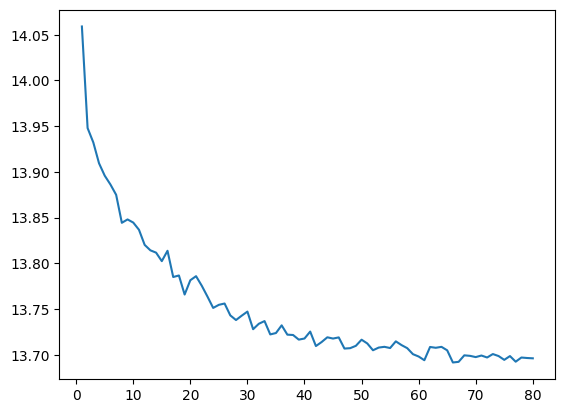

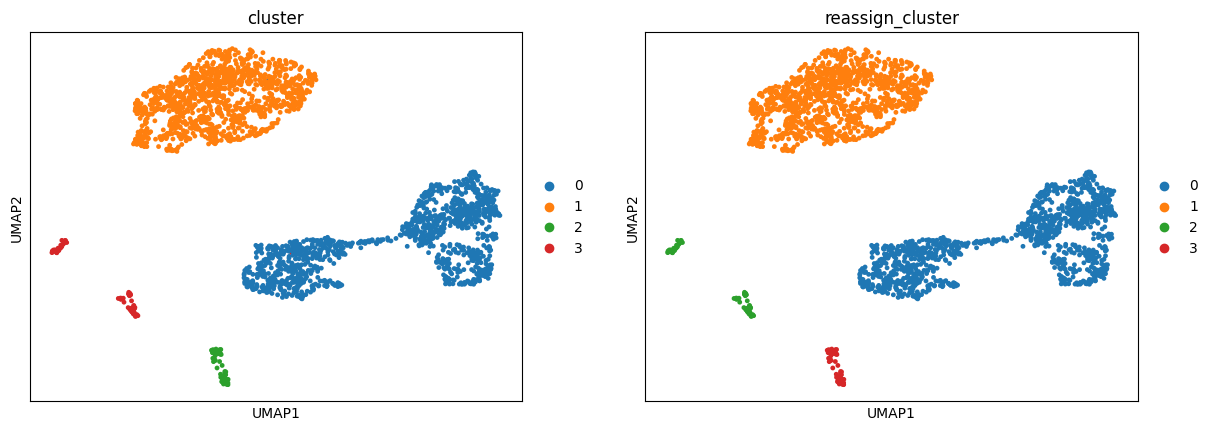

In [1]:
from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score
from scHSC.utils import accuracy
ari = adjusted_rand_score(adata.obs["reassign_cluster"],adata.obs["cluster"])
nmi = normalized_mutual_info_score(adata.obs["reassign_cluster"],adata.obs["cluster"])
acc = accuracy(adata.obs["reassign_cluster"],adata.obs["cluster"])
print("ARI={}".format(ari))
print("NMI={}".format(nmi))
print("ACC={}".format(acc))

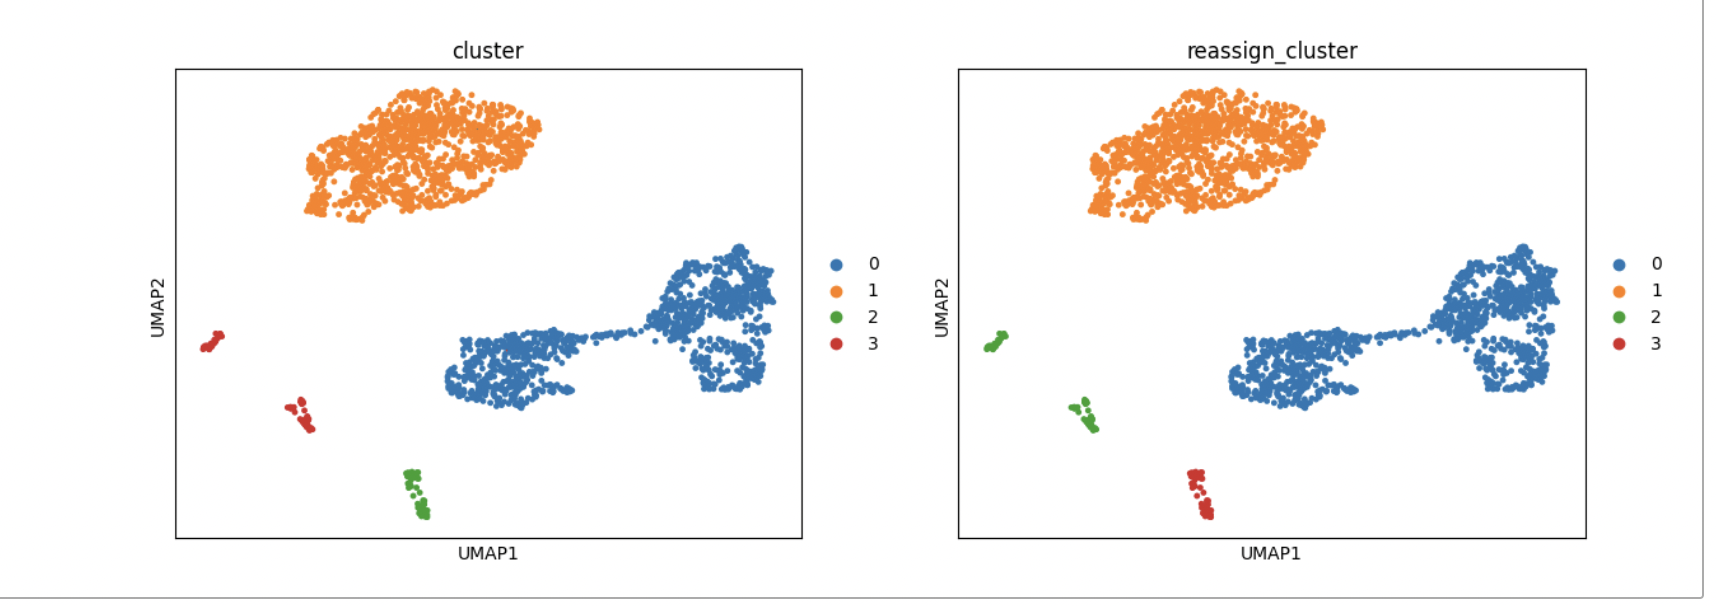